In [1]:
from QuditsOnQubits import create_ame43
from qiskit import qpy
from qiskit.circuit import QuantumCircuit
from qiskit.primitives import StatevectorSampler
from qiskit.quantum_info import Statevector, Operator
from qiskit_ibm_runtime import SamplerV2
from qiskit import transpile
import numpy as np
import matplotlib.pyplot as plt
from qiskit.primitives import StatevectorEstimator
from qiskit.quantum_info import SparsePauliOp

In [2]:
with open('Zgate.qpy', 'rb') as fd:
    Zgate = qpy.load(fd)[0]

with open('Xgate.qpy', 'rb') as fd:
    Xgate = qpy.load(fd)[0]

with open('Fgate.qpy', 'rb') as fd:
    Fgate = qpy.load(fd)[0]

with open('FDAGgate.qpy', 'rb') as fd:
    FDAGgate = qpy.load(fd)[0]

with open('ame43_v2.qpy', 'rb') as fd:
    ame43_v2 = qpy.load(fd)[0]

with open('ame43fig12.qpy', 'rb') as fd:
    ame43fig12 = qpy.load(fd)[0]

In [3]:
def exp_S(counts):
    omega = np.exp(2j * np.pi / 3)
    phase = {"00": 0, "01": 1, "10": 2}
    total_shots = sum(counts.values())
    running_sum = 0 + 0j

    for bitstr, cnt in counts.items():
        p1 = bitstr[-2:]
        p2 = bitstr[-4:-2]
        p4 = bitstr[-8:-6]

        if p1 == "11" or p2 == "11" or p4 == "11":
            continue

        lam1 = omega ** phase[p1]
        lam2 = omega ** phase[p2]
        lam4 = omega ** phase[p4]
        lam_S = lam1 * lam2 * lam4

        running_sum += lam_S * cnt

    return running_sum / total_shots

In [56]:
def exp_S2(counts):
    omega = np.exp(2j * np.pi / 3)
    phase = {"00": 0, "01": 1, "10": 2}
    total_shots = sum(counts.values())
    running_sum = 0 + 0j

    for bitstr, cnt in counts.items():
        p1 = bitstr[-2:]
        p2 = bitstr[-4:-2]
        p3 = bitstr[-6:-4]
        p4 = bitstr[-8:-6]

        if p1 == "11" or p2 == "11" or p4 == "11":
            continue

        lam1 = omega ** phase[p1]
        lam2 = omega ** phase[p2]
        lam3 = omega ** phase[p3]
        lam4 = omega ** phase[p4]
        lam_S = lam1 * lam2 * lam3 * lam4

        running_sum += lam_S * cnt

    return running_sum / total_shots

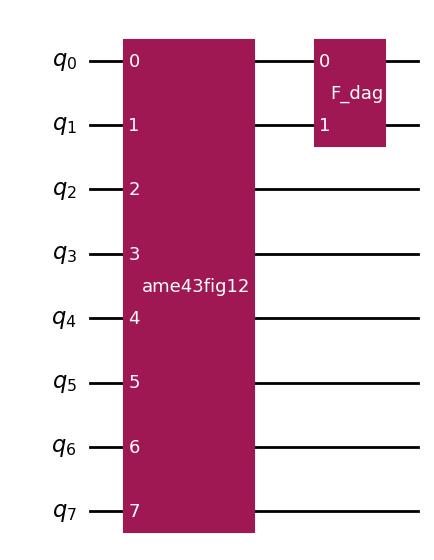

In [34]:
qc_with_dagger = QuantumCircuit(8)
qc_with_dagger.append(ame43fig12, [0, 1, 2, 3, 4, 5, 6, 7])
qc_with_dagger.append(FDAGgate, [0, 1])
#qc_with_dagger.measure_all()
qc_with_dagger.draw("mpl")

In [17]:
Statevector(ame43fig12).draw("latex")

<IPython.core.display.Latex object>

In [18]:
Statevector(FDAGgate).draw("latex")

<IPython.core.display.Latex object>

In [67]:
Statevector(Xgate).draw("latex")

<IPython.core.display.Latex object>

In [196]:
d = Statevector(qc_with_dagger).probabilities_dict()

In [197]:
filtered = { k: v for k, v in d.items() if abs(v) >= 0.0001 }

In [200]:
len(filtered)

27

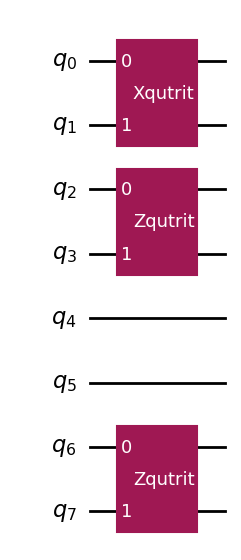

In [35]:
stabilizatorQC = QuantumCircuit(8)
stabilizatorQC.append(Xgate, [0, 1])
stabilizatorQC.append(Zgate, [2, 3])
stabilizatorQC.append(Zgate, [6, 7])
stabilizatorQC.draw("mpl")

In [39]:
stabOper = Operator(stabilizatorQC)
ame43state = Statevector(qc_with_dagger)
ame43state.expectation_value(stabOper).round(3)

np.complex128(1-0j)

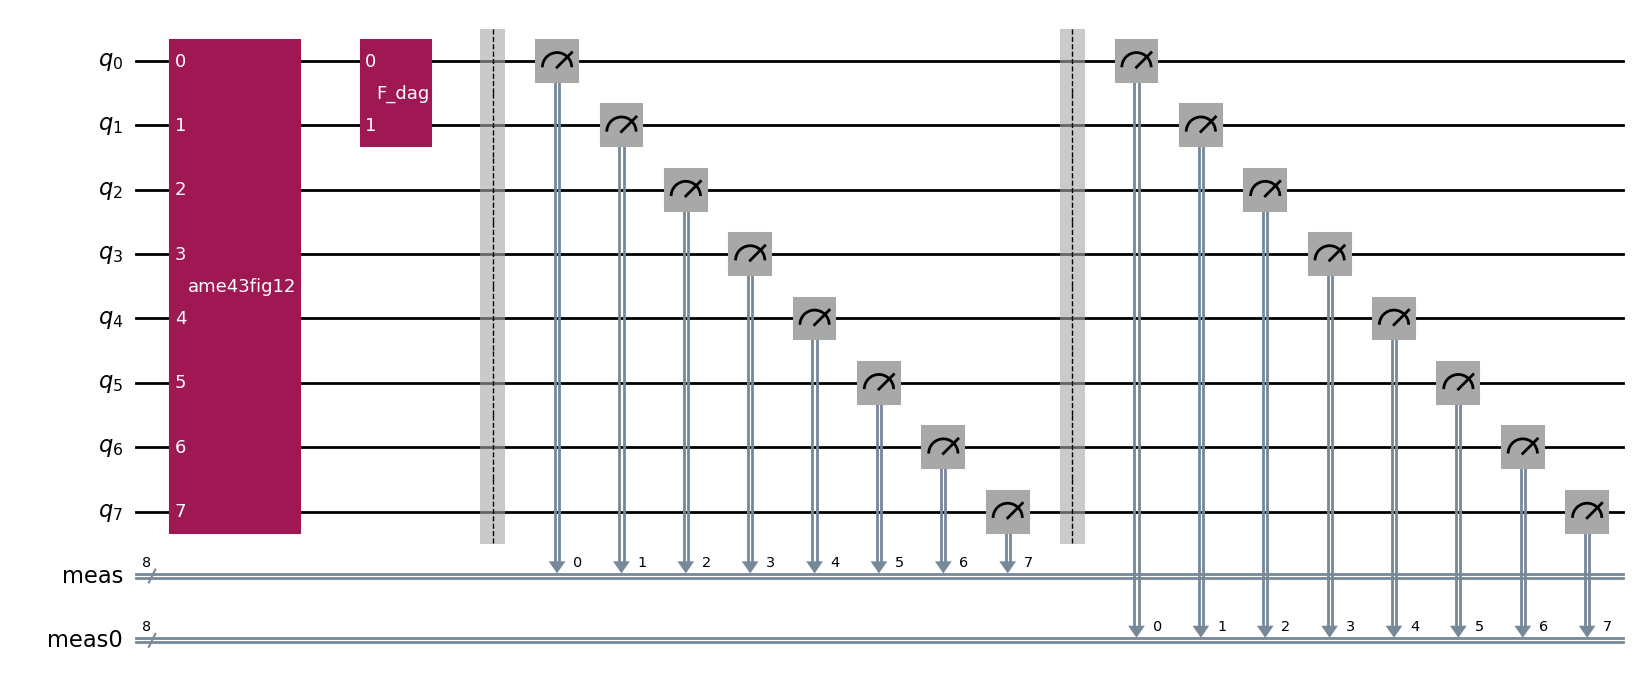

In [169]:
qc_with_dagger.measure_all()
qc_with_dagger.draw("mpl")

In [11]:
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import SamplerV2
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2

In [12]:
ame43fig12.measure_all()

In [13]:
simulator = AerSimulator()

qc_transpiled = transpile(qc_with_dagger, simulator, basis_gates=['u','cx'], optimization_level=3)
job = simulator.run(qc_transpiled, shots=10000)
result = job.result()
counts = result.get_counts()

QiskitError: 'No counts for experiment "0"'

In [211]:
counts

{'10100101': 346,
 '01011010': 385,
 '10001000': 365,
 '00101000': 377,
 '00000000': 373,
 '01000110': 365,
 '10010010': 363,
 '10001010': 364,
 '01000101': 376,
 '01100000': 362,
 '10001001': 347,
 '01100001': 382,
 '10100110': 380,
 '00101010': 360,
 '00000001': 352,
 '00010101': 386,
 '01011001': 407,
 '10010000': 368,
 '00010100': 385,
 '01011000': 375,
 '00000010': 349,
 '01000100': 379,
 '00010110': 357,
 '10100100': 377,
 '00101001': 393,
 '10010001': 364,
 '01100010': 363}

In [209]:
exp_S(counts)

np.complex128(0.0013000000000000227-0.0041569219381653j)

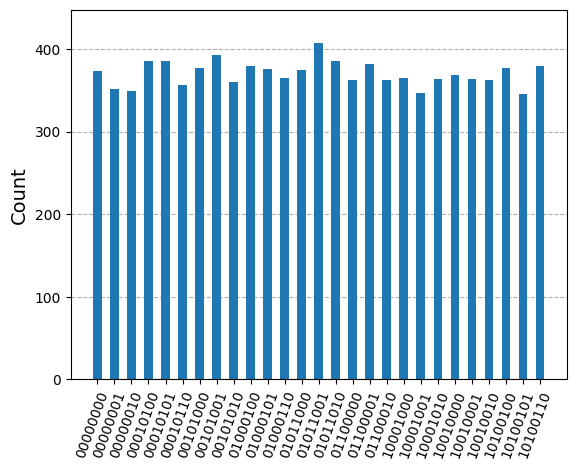

In [210]:
plot_histogram(counts, bar_labels=False)

In [143]:
service = QiskitRuntimeService(
    channel  = "ibm_quantum",
    instance = "ibm_quantum",
    token    = "69c33c504eae6077ab5a35bc23ed37d0e2ce46a8d88b9c3f72fd32883335a986ef5c86d80f8b561cbdbe773a8d56475d710fd741d28597d1148e2dcf74fe488d"
)

InvalidAccountError: 'Invalid `instance` value. Expected hub/group/project format, got ibm_quantum'

In [153]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2

In [164]:
service = QiskitRuntimeService(name='Szymon')
session = service.session()

AttributeError: 'QiskitRuntimeService' object has no attribute 'session'

In [163]:
sampler = SamplerV2(session)

ValueError: mode must be of type Backend, Session, Batch or None

In [165]:
from qiskit.providers.basic_provider import BasicProvider

In [166]:
sim = BasicProvider()

In [168]:
qc_transpiled_basic = transpile(qc_with_dagger, sim)

AttributeError: 'BasicProvider' object has no attribute 'configuration'

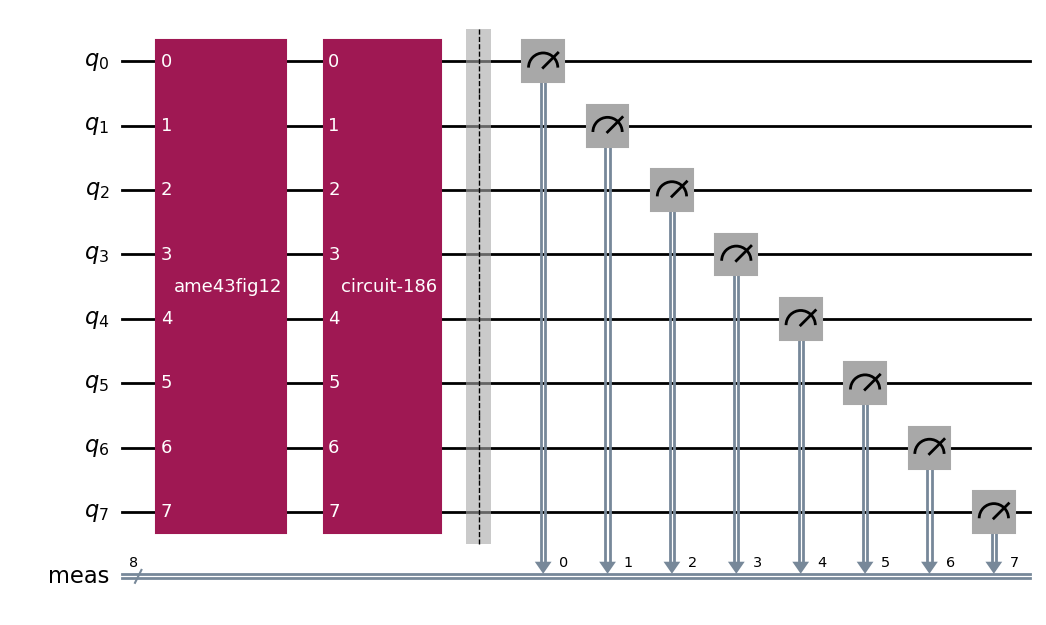

In [20]:
qc_stabli = QuantumCircuit(8)
qc_stabli.append(ame43fig12, [0, 1, 2, 3, 4, 5, 6, 7])
qc_stabli.append(stabilizatorQC, [0, 1, 2, 3, 4, 5, 6, 7])
qc_stabli.measure_all()
qc_stabli.draw("mpl")


In [21]:
simulator = AerSimulator()

qc_transpiled = transpile(qc_stabli, simulator, basis_gates=['u','cx'], optimization_level=3)
job = simulator.run(qc_transpiled, shots=10000)
result = job.result()
counts = result.get_counts()

In [22]:
exp_S(counts)

np.complex128(-0.4999999999999994+0.8660254037844388j)

In [23]:
test_ame43 = QuantumCircuit(8)
test_ame43.append(ame43fig12, [0, 1, 2, 3, 4, 5, 6, 7])
test_ame43.measure_all()

simulator = AerSimulator()

qc_transpiled = transpile(test_ame43, simulator, basis_gates=['u','cx'], optimization_level=3)
job = simulator.run(qc_transpiled, shots=10000)
result = job.result()
counts = result.get_counts()

In [24]:
exp_S(counts)

np.complex128(1-6.081801728896608e-16j)

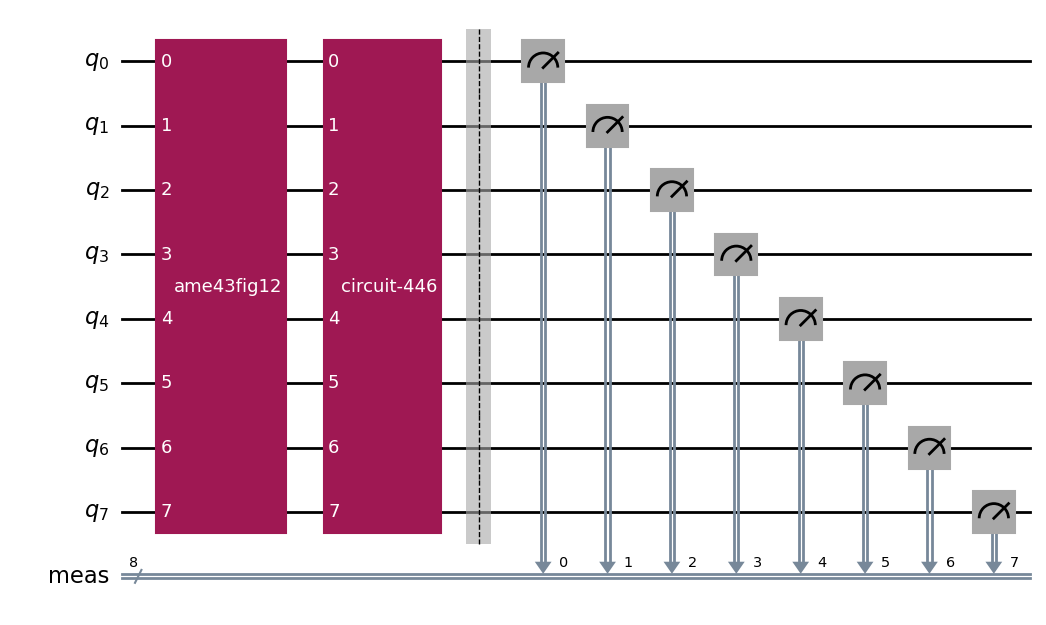

In [54]:
qc_stabli = QuantumCircuit(8)
qc_stabli.append(ame43fig12, [0, 1, 2, 3, 4, 5, 6, 7])
qc_stabli.append(stabilizatorQC2, [0, 1, 2, 3, 4, 5, 6, 7])
qc_stabli.measure_all()
qc_stabli.draw("mpl")

In [57]:
qc_transpiled = transpile(qc_stabli, simulator, basis_gates=['u','cx'], optimization_level=3)
job = simulator.run(qc_transpiled, shots=10000)
result = job.result()
counts = result.get_counts()

exp_S2(counts)

np.complex128(0.007900000000000114-0.0058889727457342314j)

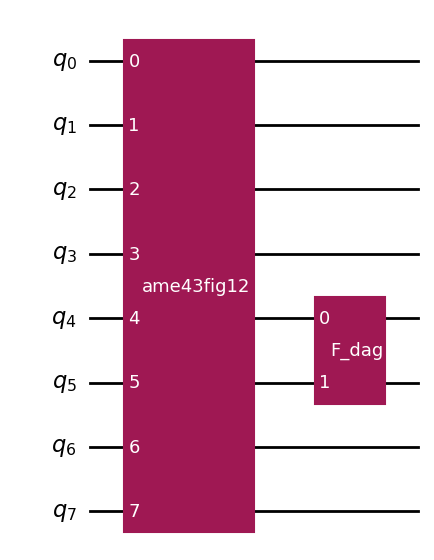

In [60]:
qc_with_dagger2 = QuantumCircuit(8)
qc_with_dagger2.append(ame43fig12, [0, 1, 2, 3, 4, 5, 6, 7])
qc_with_dagger2.append(FDAGgate, [4, 5])
#qc_with_dagger.measure_all()
qc_with_dagger2.draw("mpl")

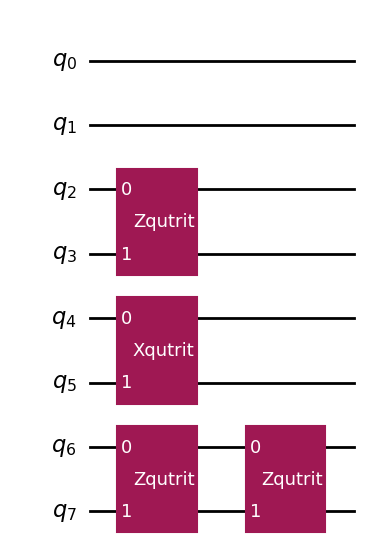

In [62]:
stabilizatorQC2 = QuantumCircuit(8)

stabilizatorQC2.append(Zgate, [2, 3])
stabilizatorQC2.append(Xgate, [4, 5])
stabilizatorQC2.append(Zgate, [6, 7])
stabilizatorQC2.append(Zgate, [6, 7])
stabilizatorQC2.draw("mpl")

In [66]:
stabOper2 = Operator(stabilizatorQC2)
ame43state2 = Statevector(ame43fig12)
ame43state2.expectation_value(stabOper2)

np.complex128(2.9280062378726017e-31-1.1357941278457209e-32j)

In [68]:
from QuditsOnQubits import create_ghz

In [69]:
ghz_raw = create_ghz()[0]

In [70]:
Statevector(ghz_raw).draw("latex")

<IPython.core.display.Latex object>

In [71]:
ghz_raw.append(FDAGgate, [2, 3])
ghz_raw.append(FDAGgate, [4, 5])

In [72]:
Statevector(ghz_raw).draw("latex")

<IPython.core.display.Latex object>

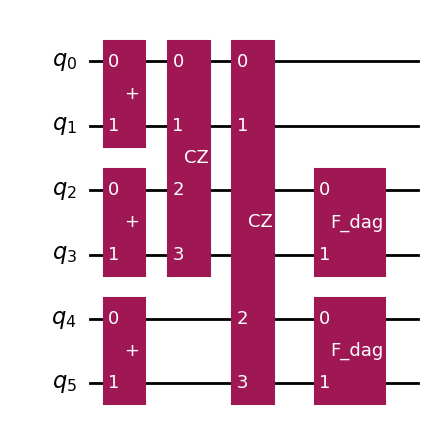

In [73]:
ghz_raw.draw("mpl")

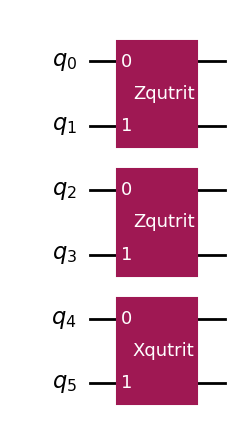

In [85]:
ghz_operator1 = QuantumCircuit(6)
ghz_operator1.append(Zgate, [0, 1])
ghz_operator1.append(Zgate, [2, 3])
ghz_operator1.append(Xgate, [4, 5])
ghz_operator1.draw("mpl")

In [86]:
Statevector(ghz_raw).expectation_value(Operator(ghz_operator1)).round(4)

np.complex128(-0j)

In [94]:
omega = np.exp(2*np.pi*1.j/3)
Z = np.array([[1, 0, 0, 0], [0, omega, 0, 0], [0, 0, omega*omega, 0], [0, 0, 0, 1]])
X = np.array([[0,0,1,0], [1,0,0,0], [0,1,0,0],[0,0,0,1]])

In [95]:
Statevector(ghz_raw).data.round(4)

array([-0.5774-0.j, -0.    -0.j, -0.    -0.j,  0.    -0.j, -0.    +0.j,
        0.    -0.j, -0.    -0.j, -0.    -0.j,  0.    -0.j, -0.    -0.j,
        0.    +0.j,  0.    +0.j,  0.    -0.j,  0.    +0.j, -0.    -0.j,
        0.    +0.j, -0.    +0.j,  0.    -0.j,  0.    -0.j, -0.    -0.j,
       -0.    -0.j, -0.5774-0.j, -0.    +0.j, -0.    +0.j,  0.    +0.j,
        0.    +0.j,  0.    -0.j, -0.    +0.j,  0.    -0.j,  0.    -0.j,
       -0.    -0.j, -0.    -0.j,  0.    -0.j, -0.    -0.j,  0.    +0.j,
        0.    +0.j,  0.    +0.j,  0.    +0.j,  0.    -0.j, -0.    +0.j,
       -0.    +0.j, -0.    +0.j, -0.5774-0.j, -0.    +0.j,  0.    +0.j,
       -0.    -0.j,  0.    -0.j, -0.    -0.j,  0.    -0.j,  0.    +0.j,
        0.    +0.j,  0.    +0.j,  0.    -0.j,  0.    -0.j,  0.    -0.j,
       -0.    +0.j, -0.    -0.j,  0.    +0.j,  0.    -0.j, -0.    -0.j,
        0.    +0.j,  0.    +0.j,  0.    +0.j, -0.    +0.j])

In [102]:
np.kron(np.kron(Z, Z), X) @ Statevector(ghz_raw).data.round(4)

array([ 0.    +0.j        , -0.5774+0.j        ,  0.    +0.j        ,
        0.    +0.j        ,  0.    +0.j        ,  0.    +0.j        ,
        0.    +0.j        ,  0.    +0.j        ,  0.    +0.j        ,
        0.    +0.j        ,  0.    +0.j        ,  0.    +0.j        ,
        0.    +0.j        ,  0.    +0.j        ,  0.    +0.j        ,
        0.    +0.j        ,  0.    +0.j        ,  0.    +0.j        ,
        0.    +0.j        ,  0.    +0.j        ,  0.    +0.j        ,
        0.    +0.j        ,  0.2887+0.50004307j,  0.    +0.j        ,
        0.    +0.j        ,  0.    +0.j        ,  0.    +0.j        ,
        0.    +0.j        ,  0.    +0.j        ,  0.    +0.j        ,
        0.    +0.j        ,  0.    +0.j        ,  0.    +0.j        ,
        0.    +0.j        ,  0.    +0.j        ,  0.    +0.j        ,
        0.    +0.j        ,  0.    +0.j        ,  0.    +0.j        ,
        0.    +0.j        ,  0.2887-0.50004307j,  0.    +0.j        ,
        0.    +0.j  

In [77]:
qubit_ghz = QuantumCircuit(2)
qubit_ghz.h(0)
qubit_ghz.cx(0, 1)
Statevector(qubit_ghz).draw("latex")

<IPython.core.display.Latex object>

In [78]:
qubit_operator = QuantumCircuit(2)
qubit_operator.x(0)
qubit_operator.x(1)

In [79]:
Statevector(qubit_ghz).expectation_value(Operator(qubit_operator))

np.complex128(0.9999999999999998+0j)

In [3]:
omega = np.exp(2*np.pi*1.j/3)
Z = [[1, 0, 0, 0], [0, omega, 0, 0], [0, 0, omega*omega, 0], [0, 0, 0, 1]]
X = [[0,0,1,0], [1,0,0,0], [0,1,0,0],[0,0,0,1]]

In [5]:
from numpy.linalg import multi_dot

In [6]:
G1 = np.kron(np.kron(np.kron(X, Z), np.identity(4)), Z)
G1G2 = np.kron(np.kron(np.kron(np.dot(X, Z), np.dot(Z, X)), Z), Z)
G1G2pow2 = np.kron(np.kron(np.kron(multi_dot([X, Z, Z]), multi_dot([Z, X, X])), multi_dot([Z, Z])), Z)
G3 = np.kron(np.kron(np.kron(np.identity(4), Z), X), multi_dot([Z, Z]))
G1G4 = np.kron(np.kron(np.kron(multi_dot([X, Z]), Z), multi_dot([Z, Z])), multi_dot([Z, X]))

In [17]:
ame43fig12state = Statevector(ame43fig12).data.reshape(-1, 1).round(4)

In [20]:
ame43fig12state.conjugate().transpose() @ G1 @ ame43fig12state

array([[0.+0.j]])

In [9]:
G1.shape

(256, 256)

In [10]:
ame43fig12state.shape

(256,)

In [14]:
ame43fig12state.reshape(-1, 1).shape

(256, 1)